# <font color="#4F7942">Enem 2020</font>
-------

Análise Exploratória de Dados (AED)
- Analisar os dados da prova do Exame Nacional do Nível Médio - Enem 2020;
- Base muito importante para políticas públicas na área de educação;
- Rica em características dos candidatos;
- Entender quais características dos candidatos tem alguma relação com a nota.

#### <font color="#4F7942">Objeto do Estudo</font>

Vamos trabalhar com informações de microdados do ENEM realizado em 2020. De acordo com o site do [INEP](https://www.gov.br/inep/pt-br), o ENEM tem o objetico de avaliar o desempenho escolar dos estudantes ao término da educação básica.   As notas do Enem podem ser usadas para acesso ao Sistema de Seleção Unificada (Sisu) e ao Programa Universidade para Todos (ProUni). Elas também são aceitas em mais de 50 instituições de educação superiror portuguesas. Além disso, os participantes do Enem podem pleitear financiamento estudantil em programas do governo, como o Fundo de Financiamento Estudantil (Fies). Os resultados do Enem possibiliam, ainda, o desenvolvimento de estudos e indicadores educacionais.  
  
Conhecer bem os dados dos aplicantes para a prova pode forncer insights preciosos para a educação brasileira. Para o presente estudo vamos avaliar indicadores sociais, de escolaridade dos pais e outras indicações tem correlações com as **notas** dos candidatos.   

Fonte dos dados: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem  <br>

*Projeto realizado na formação da "Let's Data" - Jornada Cientista de Dados* - https://www.letsdata.ai/

-------  




In [2]:
# bibliotecas utilizadas
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


# Configurações Iniciais
# configurando o pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#configurando o pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
# Visando diminuir o tamanho do arquivo em disco, foi realizada a conversão do arquivo '.csv' para '.parquet'
# Instalar o pyarrow:
#!pip install pyarrow

In [2]:
# Convertendo o arquivo csv em parquet
df_enem_csv = pd.read_csv('./dados/dados2020.csv', encoding='latin1', sep=';')
df_enem_csv.to_parquet('./dados/dados2020.parquet')

In [3]:
df_enem = pd.read_parquet('./dados/dados2020.parquet')
df_enem.shape # mostrando o numero linhas x colunas

(5783109, 76)

In [6]:
# primeira visualização dos dados
df_enem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,1501402,Belém,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,200001195856,2020,11,M,2,3,1,1,11,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,2408102,Natal,24,RN,1,1,1,1,702.00,689.00,693.00,698.00,604.10,661.70,595.30,711.30,BCBDBDCCCDBDDBADEEACEEAECBECCDBCACDEBEECEBAAE,BCAECABCDCEBDBBBDAABABACBCDDDBDDBABDAADACACBC,99999CADDEDADBAABEAADAAAADCADAABDCCBEECAEECAAC...,EBEBDEDAECBADCADDABACAEDBEEEAEADCCBCEACDACEBB,1,ABBACBCCCDDDDBAEEBECEDACABDCBEDAECDABECCBBADE,BCEECDBCCDEBDBBBBEAAAEACBCDDDBDDBABDABDDBAABC,99999CBDDEDBDBACECABAAAEAECCDCABCBBBBEEDCECAAE...,BBEADECAECBBXCEBADBACAEDACEDADAADCBCCBBDABBEE,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,200001943954,2020,4,F,2,3,2,2,0,2,1.00,0,2927408.00,Salvador,29.00,BA,2.00,1.00,1.00,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,0,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,1.00,0,3547304.00,Santana de Parnaíba,35.00,SP,3.00,1.00,1.00,3547304,Santana de Parnaíba,35,SP,1,1,1,1,700.00,688.00,692.00,696.00,620.80,675.00,624.20,759.40,EBEDCCCDCBDBAECAECCECEACCBAABBBCEABCAAAEBEBAE,DABCCACCBCCDCADBDCBAAEBDDBAABDBAEBEBBABDABDBE,DCEAB99999AADAECCEBCDDDCBABDDABBCEEBAEDDDADEBE...,CBDBDCCDDEECBAABBBADEDEDBECDEBBADAEBAABBECBBA,0,BDECCACBEBDEAEDAECCBAEABCCEADDBBCADCBDDEBDBAC,DABCCAECBABECADBDCCABDBCDDAABDBAEBEBBDBDDBDBE,DCEAD99999AADACCCCBBDDCABAECAABBEECBAEDDBBEEBE...,EBDBXCCDAEECBAABABAEDDEDAECBCDCADEEBBABBACBCA,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,200001634757,2020,4,F,1,3,2,1,1,1,NaN,0,NaN,None,NaN,None,NaN,NaN,NaN,3121605,Diamantina,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,1,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B


In [7]:
# Contando o número de candidatos
len(df_enem['NU_INSCRICAO'].unique())

5783109

In [8]:
# informações das colunas
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783109 entries, 0 to 5783108
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [9]:
# Localizando as colunas que iniciam com 'NU'
lista_colunas_com_nu = [coluna for coluna in df_enem.columns if 'NU' in coluna]
lista_colunas_com_nu

['NU_INSCRICAO',
 'NU_ANO',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [10]:
# Removendo as colunas que não nos interessam. 
# Colunas de respostas das questões (que começam com 'TX_')

colunas_questoes = [coluna for coluna in df_enem.columns if coluna.startswith('TX_')]
colunas_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [11]:
# Removendo as colunas que não nos interessam. 
# Colunas de codigos (que começam com 'CO_')
colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith('CO_')]
colunas_codigos


['CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [12]:
# Removendo as colunas que não nos interessam. 
# Analises por municipios
colunas_municipio = [coluna for coluna in df_enem.columns if 'MUNICIPIO' in coluna]
colunas_municipio

['CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [13]:
# Removendo as colunas que não nos interessam:
colunas_remover = colunas_questoes + colunas_codigos + colunas_municipio + ['NU_INSCRICAO', 'NU_ANO']
df_enem = df_enem.drop(colunas_remover, axis=1)
# df_enem.head()

In [14]:
df_enem.shape

(5783109, 56)

## <font color="#4F7942">Dicionário de Dados</font>
-------

TP_ESTADO_CIVIL	Estado Civil	
        0	Não informado  	
        1	Solteiro(a)  		
		2	Casado(a)/Mora com companheiro(a)  		
		3	Divorciado(a)/Desquitado(a)/Separado(a)	  	
		4	Viúvo(a)  		

TP_COR_RACA	Cor/raça  	
        0	Não declarado  
		1	Branca  
		2	Preta  
		3	Parda  
		4	Amarela  
		5	Indígena   

TP_NACIONALIDADE	Nacionalidade  	
        0	Não informado    
		1	Brasileiro(a)  
		2	Brasileiro(a) Naturalizado(a)  
		3	Estrangeiro(a)  
		4	Brasileiro(a) Nato(a), nascido(a) no exterior  
  
TP_ST_CONCLUSAO	Situação de conclusão do Ensino Médio  	
        1	Já concluí o Ensino Médio  
		2	Estou cursando e concluirei o Ensino Médio em 2020  
		3	Estou cursando e concluirei o Ensino Médio após 2020  
		4	Não concluí e não estou cursando o Ensino Médio  
        
**Notas:**

NU_NOTA_CN	Nota da prova de Ciências da Natureza  
NU_NOTA_CH	Nota da prova de Ciências Humanas  
NU_NOTA_LC	Nota da prova de Linguagens e Códigos  
NU_NOTA_MT	Nota da prova de Matemática  
NU_NOTA_REDACAO

## <font color="#4F7942">Estatística descritiva</font> 
------

In [15]:
df_enem.describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,5783109.00,5783109.00,5783109.00,5783109.00,5783109.00,5783109.00,5783109.00,1303446.00,5783109.00,904569.00,904569.00,904569.00,5783109.00,5783109.00,5783109.00,5783109.00,2597440.00,2754140.00,2754140.00,2597440.00,5783109.00,2754140.00,2754140.00,2754140.00,2754140.00,2754140.00,2754140.00,2754140.00,5687143.00
mean,6.40,1.10,2.15,1.03,1.45,3.32,1.28,1.01,0.10,2.44,1.03,1.01,0.45,0.48,0.48,0.45,490.41,511.15,523.80,520.58,0.54,1.11,119.73,121.89,110.34,123.49,97.96,573.41,3.71
std,4.17,0.48,1.01,0.21,0.69,4.54,0.52,0.08,0.30,0.91,0.18,0.18,0.50,0.50,0.50,0.50,80.00,96.22,74.55,117.31,0.50,0.73,33.30,50.66,44.47,38.31,58.87,199.82,1.47
min,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,3.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,427.00,435.30,478.00,425.80,0.00,1.00,100.00,120.00,80.00,100.00,40.00,460.00,3.00
50%,5.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,483.70,512.50,529.90,505.10,1.00,1.00,120.00,120.00,120.00,120.00,100.00,580.00,4.00
75%,11.00,1.00,3.00,1.00,2.00,5.00,1.00,1.00,0.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,548.70,580.60,576.40,602.30,1.00,1.00,140.00,160.00,140.00,140.00,140.00,700.00,4.00
max,20.00,4.00,5.00,4.00,4.00,14.00,3.00,2.00,1.00,4.00,2.00,4.00,2.00,2.00,2.00,2.00,854.80,862.60,801.10,975.00,1.00,9.00,200.00,200.00,200.00,200.00,200.00,1000.00,20.00


In [16]:
# Separando as colunas de NOTAS
colunas_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
colunas_notas = [coluna for coluna in colunas_notas if 'COMP' not in coluna]
colunas_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

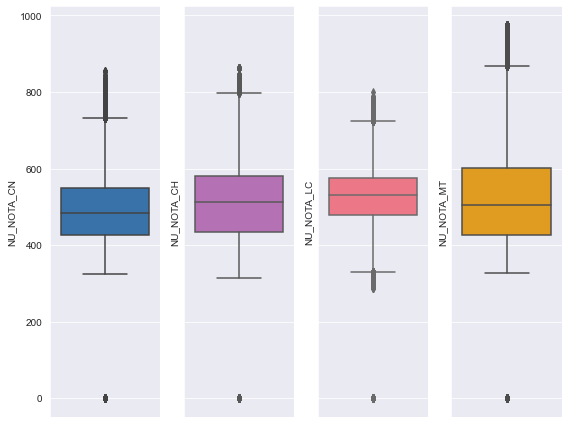

In [31]:
# Analisando as NOTAS

sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6), tight_layout=True)


cores = ['#2573bb','#bf67bf','#ff6479','#ffa600']
for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_enem, y=coluna_1, ax=graficos[i], color=cores[i])

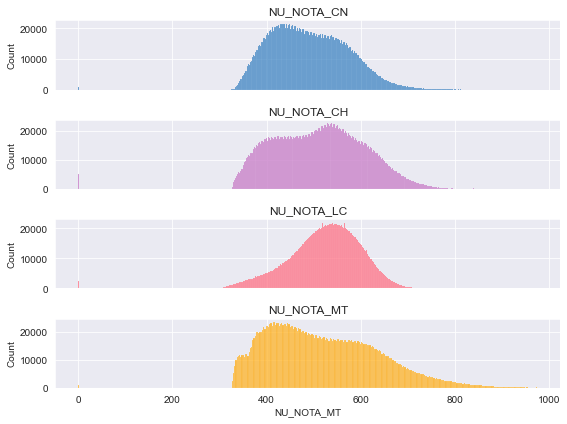

In [34]:
# Analisando as distribuições das notas

sns.set_style("darkgrid")
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(8,6), tight_layout=True)

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.histplot(data=df_enem[coluna_1], ax=graficos[i], color=cores[i]).set_title(coluna_1)
    


Text(0.5, 1.0, 'Nota da Redação')

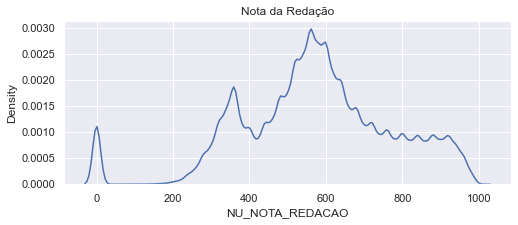

In [47]:
# Analisando as notas da redação - gráfico de densidade
sns.set(rc={'figure.figsize':(8,3)})
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO']).set_title('Nota da Redação')

##  <font color="#4F7942">Analisando as informações</font>
----------

###  SEXO

In [4]:
# Analisando o sexo dos candidatos - em porcentagem
df_enem['TP_SEXO'].value_counts(normalize=True)*100

F   59.98
M   40.02
Name: TP_SEXO, dtype: float64

<AxesSubplot:xlabel='TP_SEXO', ylabel='count'>

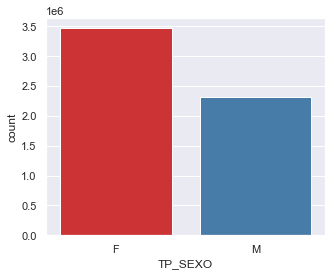

In [50]:
# Gráfico F x M
sns.set(rc={'figure.figsize':(5,4)})
sns.countplot(data=df_enem, x='TP_SEXO', palette='Set1')

### ESTADO CIVIL

In [51]:
# Analisando o Estado Civil

'''
TP_ESTADO_CIVIL Estado Civil
0 Não informado
1 Solteiro(a)
2 Casado(a)/Mora com companheiro(a)
3 Divorciado(a)/Desquitado(a)/Separado(a)
4 Viúvo(a)
'''

df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

0     263848
1    4851310
2     527734
3     131423
4       8794
Name: TP_ESTADO_CIVIL, dtype: int64

<AxesSubplot:xlabel='TP_ESTADO_CIVIL', ylabel='count'>

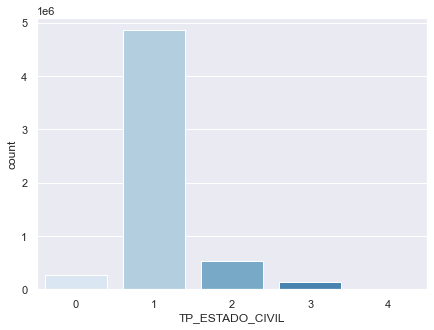

In [63]:
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(data=df_enem, x='TP_ESTADO_CIVIL', palette='Blues')

### RAÇA

In [58]:
# Analisando a raça
'''
TP_COR_RACA	Cor/raça 
0	Não declarado  
1	Branca  
2	Preta  
3	Parda  
4	Amarela  
5	Indígena  
'''
df_enem['TP_COR_RACA'].value_counts().sort_index()

0     116883
1    2007633
2     771740
3    2720485
4     128522
5      37846
Name: TP_COR_RACA, dtype: int64

<AxesSubplot:xlabel='TP_COR_RACA', ylabel='count'>

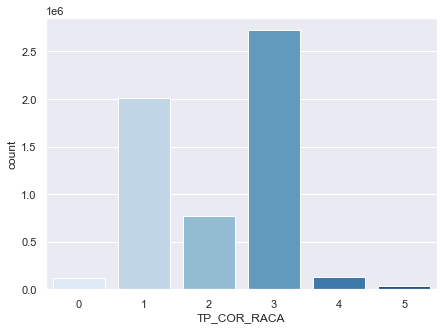

In [64]:
sns.countplot(data=df_enem, x='TP_COR_RACA', palette='Blues')

### UNIDADE FEDERATIVA

In [66]:
ufs = df_enem['SG_UF_ESC'].value_counts()
ufs

SP    167183
CE    104981
MG     71614
RJ     62583
PE     47583
BA     47235
PR     43060
GO     39769
RS     36478
PA     33109
AM     30120
SC     27373
MA     26104
DF     19840
PB     19760
ES     18419
PI     15738
MT     14674
RN     14327
AL     13976
MS     11851
SE     10878
RO      9927
TO      8457
AP      3565
AC      3512
RR      2453
Name: SG_UF_ESC, dtype: int64

In [67]:
# transformando o 'value_conts()' das UFs acima em um novo DataFrame pandas:
df_ufs = pd.DataFrame({'uf': ufs.index ,'candidatos': ufs.values})
df_ufs.head()


,uf,candidatos
0,SP,167183
1,CE,104981
2,MG,71614
3,RJ,62583
4,PE,47583


In [78]:
# distribuição dos candidatos por Estado

import plotly.express as px

fig = px.treemap(data_frame=df_ufs,
                path = ['uf'],
                values = 'candidatos', color='candidatos',
                color_continuous_scale='RdBu')
fig.update_traces(root_color='lightgrey')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()


### ESCOLARIDADE PAIS OU RESPONSÁVEIS

In [79]:
# O Enem possui um questionário sócio-econômico:

# Q001 - Até que série seu pai, ou homem responsável, estudou?
'''
A Nunca estudou.
B Não completou a 4a série/5a série do Ensino Fundamental
C Completou a 4a /5a série, mas não completou 8a/9o ano do Ensino Fundamental
D Completou a  8a/9o ano do Ensino Fundamental, mas não completou Ensino Médio
E Completou Ensino Médio, mas não completou Faculdade
F Completou Faculdade, mas não completou a Pós-Graduação
G Completou a Pós-Graduação
H Não sei
'''
df_enem['Q001'].value_counts().sort_index()


A     336216
B    1324198
C     839009
D     615284
E    1444832
F     382851
G     239720
H     505033
Name: Q001, dtype: int64

In [44]:
# Q002 - Até que série sua mãe, ou mulher responsável, estudou?
'''
A Nunca estudou.
B Não completou a 4a série/5a série do Ensino Fundamental
C Completou a 4a /5a série, mas não completou 8a/9o ano do Ensino Fundamental
D Completou a  8a/9o ano do Ensino Fundamental, mas não completou Ensino Médio
E Completou Ensino Médio, mas não completou Faculdade
F Completou Faculdade, mas não completou a Pós-Graduação
G Completou a Pós-Graduação
H Não sei
'''
df_enem['Q002'].value_counts().sort_index()

A     239085
B    1044422
C     788103
D     697557
E    1796085
F     532008
G     434437
H     155446
Name: Q002, dtype: int64

In [80]:
# criando novas variáveis para delimitar pais que possuem nível superiror
df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F','G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F','G'])
df_enem.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,pai_possui_superior,mae_possui_superior
0,11,F,1,2,1,1,11,1,NaN,0,None,NaN,NaN,NaN,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False
1,11,M,2,3,1,1,11,1,NaN,0,None,NaN,NaN,NaN,RN,1,1,1,1,604.10,661.70,595.30,711.30,1,1.00,120.00,120.00,120.00,120.00,100.00,580.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False
2,4,F,2,3,2,2,0,2,1.00,0,BA,2.00,1.00,1.00,BA,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.00,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A,False,False
3,2,M,1,3,1,2,0,2,1.00,0,SP,3.00,1.00,1.00,SP,1,1,1,1,620.80,675.00,624.20,759.40,0,1.00,140.00,200.00,140.00,120.00,160.00,760.00,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,False
4,4,F,1,3,2,1,1,1,NaN,0,None,NaN,NaN,NaN,MG,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.00,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,False,True


In [81]:
df_enem['pai_possui_superior'].value_counts(normalize=True) * 100

False   89.23
True    10.77
Name: pai_possui_superior, dtype: float64

<AxesSubplot:xlabel='pai_possui_superior', ylabel='count'>

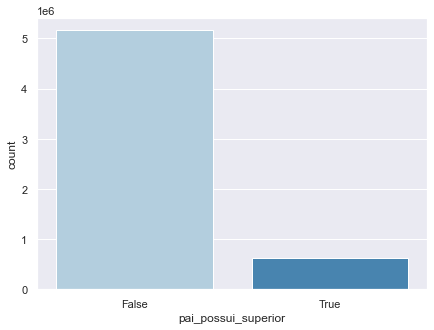

In [87]:
# Q001 - Até que série seu pai, ou homem responsável, estudou?
sns.countplot(data=df_enem, x='pai_possui_superior', palette='Blues')

In [54]:
df_enem['mae_possui_superior'].value_counts(normalize=True) * 100

False   83.29
True    16.71
Name: mae_possui_superior, dtype: float64

<AxesSubplot:xlabel='mae_possui_superior', ylabel='count'>

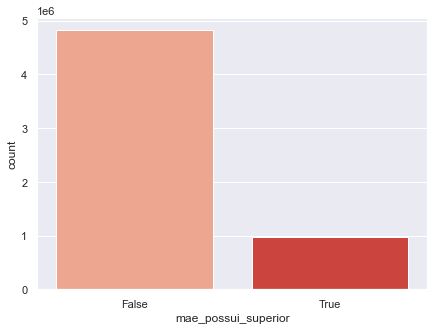

In [86]:
# Até que série sua mãe, ou a mulher responsável por você, estudou?
sns.countplot(data=df_enem, x='mae_possui_superior', palette='Reds')

### RENDA FAMILIAR

In [88]:
# Renda Familiar
# Transformar Q006 em algo numérico

'''
A	Nenhuma Renda
B	Até R$ 1.045,00
C	De R$ 1.045,01 até R$ 1.567,50
D	De R$ 1.567,51 até R$ 2.090,00
E	De R$ 2.090,01 até R$ 2.612,50
F	De R$ 2.612,51 até R$ 3.135,00
G	De R$ 3.135,01 até R$ 4.180,00
H	De R$ 4.180,01 até R$ 5.225,00
I	De R$ 5.225,01 até R$ 6.270,00
J	De R$ 6.270,01 até R$ 7.315,00
K	De R$ 7.315,01 até R$ 8.360,00
L	De R$ 8.360,01 até R$ 9.405,00
M	De R$ 9.405,01 até R$ 10.450,00
N	De R$ 10.450,01 até R$ 12.540,00
O	De R$ 12.540,01 até R$ 15.675,00
P	De R$ 15.675,01 até R$ 20.900,00
Q	Acima de R$ 20.900,00

'''


from string import ascii_uppercase

dicionario_renda = dict()

for i, letra in enumerate(ascii_uppercase):
    if i == 17:  # até a letra Q (17)
        break
    dicionario_renda[letra] = i
    
dicionario_renda

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16}

In [90]:
df_enem['Q006'].value_counts().sort_index()

A     459211
B    1884219
C    1039889
D     723147
E     339346
F     355481
G     252580
H     171316
I      98901
J      58292
K      45556
L      34385
M      47107
N      45106
O      41067
P      40445
Q      51095
Name: Q006, dtype: int64

In [101]:
# mapeamento
df_enem['renda_familiar'] = df_enem['Q006'].map(dicionario_renda)
df_enem['renda_familiar'].value_counts().sort_index()

0.00      459211
1.00     1884219
2.00     1039889
3.00      723147
4.00      339346
5.00      355481
6.00      252580
7.00      171316
8.00       98901
9.00       58292
10.00      45556
11.00      34385
12.00      47107
13.00      45106
14.00      41067
15.00      40445
16.00      51095
Name: renda_familiar, dtype: int64

<AxesSubplot:xlabel='renda_familiar', ylabel='count'>

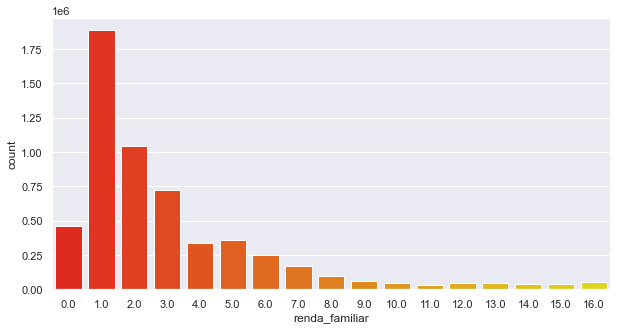

In [113]:
# análise de renda
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data=df_enem, x='renda_familiar', palette='autumn')

## <font color="#4F7942">Relacionando as *NOTAS* com características dos candidatos</font>
-------

Avaliar se as notas dos candidatos são diferentes em relacção a:
- sexo
- estado civil
- raça
- unidade federativa
- escolaridade pais
- renda familiar

### NOTAS x SEXO

In [114]:
df_sexo = df_enem.loc[:, colunas_notas + ['TP_SEXO']]
df_sexo.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_SEXO
0,NaN,NaN,NaN,NaN,NaN,F
1,604.10,661.70,595.30,711.30,580.00,M
2,NaN,NaN,NaN,NaN,NaN,F
3,620.80,675.00,624.20,759.40,760.00,M
4,NaN,NaN,NaN,NaN,NaN,F


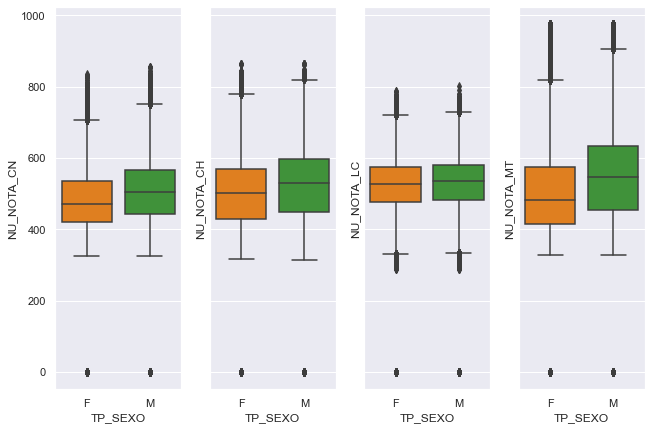

In [120]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(9,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_sexo, y=coluna_1, x='TP_SEXO', ax=graficos[i], palette='Paired_r')

### NOTAS x ESTADO CIVIL

In [126]:
df_estcivil = df_enem.loc[:, colunas_notas + ['TP_ESTADO_CIVIL']]
df_estcivil.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_ESTADO_CIVIL
0,NaN,NaN,NaN,NaN,NaN,1
1,604.10,661.70,595.30,711.30,580.00,2
2,NaN,NaN,NaN,NaN,NaN,2
3,620.80,675.00,624.20,759.40,760.00,1
4,NaN,NaN,NaN,NaN,NaN,1


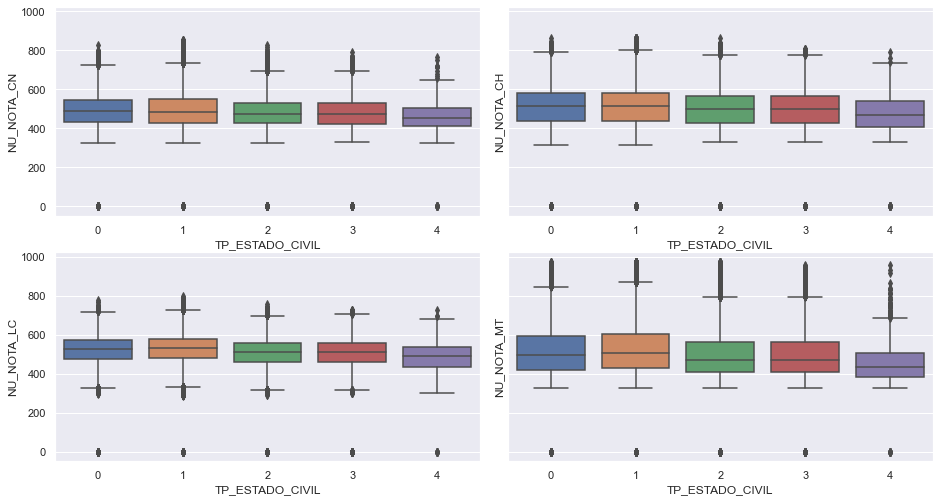

In [127]:
'''
0 Não informado
1 Solteiro(a)
2 Casado(a)/Mora com companheiro(a)
3 Divorciado(a)/Desquitado(a)/Separado(a)
4 Viúvo(a)
'''

sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(13,7))
plt.tight_layout()

for i in range(2):
    coluna_1 = colunas_notas[i*2] # 0 e 2
    coluna_2 = colunas_notas[i*2+1] # 1 e 3
    sns.boxplot(data=df_estcivil, y=coluna_1, x='TP_ESTADO_CIVIL', ax=graficos[i][0])
    sns.boxplot(data=df_estcivil, y=coluna_2, x='TP_ESTADO_CIVIL', ax=graficos[i][1])

### NOTAS x RAÇA

In [121]:
df_raca = df_enem.loc[:, colunas_notas + ['TP_COR_RACA']]
df_raca.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_COR_RACA
0,NaN,NaN,NaN,NaN,NaN,2
1,604.10,661.70,595.30,711.30,580.00,3
2,NaN,NaN,NaN,NaN,NaN,3
3,620.80,675.00,624.20,759.40,760.00,3
4,NaN,NaN,NaN,NaN,NaN,3


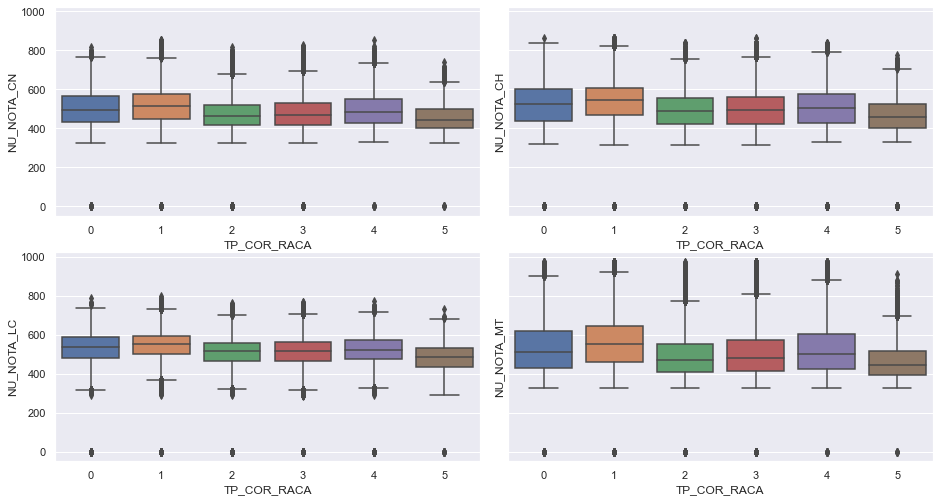

In [122]:
'''
0	Não declarado  
1	Branca  
2	Preta  
3	Parda  
4	Amarela  
5	Indígena 
'''

sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(13,7))
plt.tight_layout()

for i in range(2):
    coluna_1 = colunas_notas[i*2] # 0 e 2
    coluna_2 = colunas_notas[i*2+1] # 1 e 3
    sns.boxplot(data=df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i][0])
    sns.boxplot(data=df_raca, y=coluna_2, x='TP_COR_RACA', ax=graficos[i][1])

### NOTAS X UNIDADE FEDERATIVA
Foram selecionadas as UF com maior número de candidatos: SP, CE, MG e RJ


In [19]:
df_enem['ufs_candidatos'] = df_enem['SG_UF_ESC'].isin(['SP','CE','MG','RJ'])
df_uf_esc = df_enem.loc[df_enem['ufs_candidatos'] == True, colunas_notas + ['SG_UF_ESC']]
df_uf_esc.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,SG_UF_ESC
3,620.80,675.00,624.20,759.40,760.00,SP
89,578.40,681.10,638.20,669.80,820.00,SP
93,606.30,659.80,607.10,743.00,920.00,RJ
113,NaN,NaN,NaN,NaN,NaN,CE
119,519.80,550.60,579.50,648.60,640.00,MG


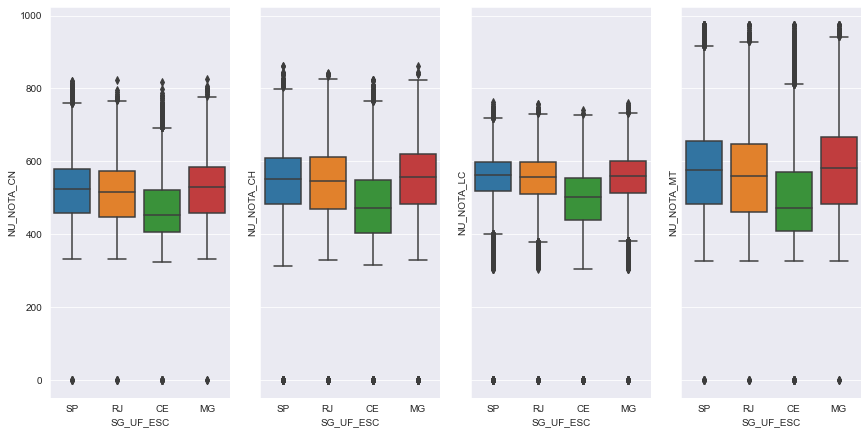

In [21]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(12,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_uf_esc, y=coluna_1, x='SG_UF_ESC', ax=graficos[i])

### NOTAS x ESCOLARIDADE PAIS

In [123]:
df_instrucao_pais = df_enem.loc[:, colunas_notas + ['pai_possui_superior', 'mae_possui_superior']]
df_instrucao_pais.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,pai_possui_superior,mae_possui_superior
0,NaN,NaN,NaN,NaN,NaN,False,False
1,604.10,661.70,595.30,711.30,580.00,False,False
2,NaN,NaN,NaN,NaN,NaN,False,False
3,620.80,675.00,624.20,759.40,760.00,False,False
4,NaN,NaN,NaN,NaN,NaN,False,True


***Escolaridade - Pai ou homem responsável***

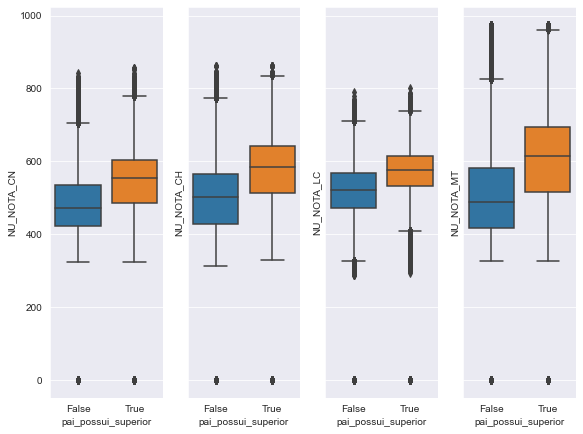

In [89]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='pai_possui_superior', ax=graficos[i])

***Escolaridade - Mãe ou mulher responsável***

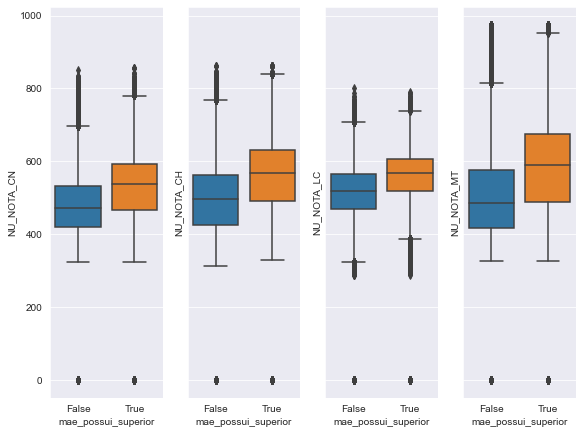

In [90]:
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='mae_possui_superior', ax=graficos[i])

### NOTAS x RENDA FAMILIAR

<AxesSubplot:>

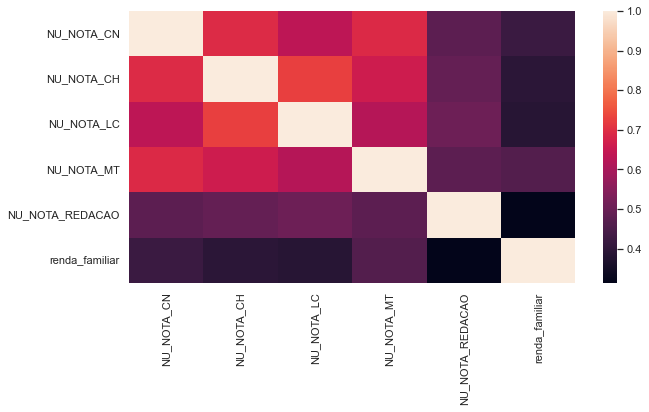

In [125]:
# mapa de calor
df_renda = df_enem.loc[:, colunas_notas + ['renda_familiar']]
correlacoes_renda = df_renda.corr()
sns.heatmap(correlacoes_renda)

# <font color="#4F7942">Conclusões</font> 
-------

Depois de analisar os dados com o objetivo de avaliar possíveis relações entre as características dos candidatos e as notas dos mesmos, podemos afirmar que existe alguma evidênicia de correlações entre as notas e:  

- raça - principalmente indígenas;
- unidade federativa - comparando os estados com maior número de candidatos (SP, CE, MG, RJ), o CE obteve desempenho inferior em relação as notas;
- escolaridade dos pais - as notas foram muito inferiores para os pais/responsáveis que não possuem ensino superior;
- renda familiar - influenciou um pouco na nota de matemática (correlação acima de 0,5)
  
A grande maioria dos candidadtos possui renda familiar inferior a R$ 2090,00.  
  
O candidato "padão" do Enem é mulher, abaixo de 20 anos, solteira, parda, com renda familiar inferior a R$ 1.567,50, com paiS/responsáveis sem ensino superior completo.